In [20]:
import pandas as pd

def analyze_data(data):
  """Analyzes data types and suggests preprocessing steps."""
  print("Attribute | Type | Justification | Preprocessing")
  print("---|---|---|---|")

  for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
      if pd.api.types.is_integer_dtype(data[col]):
        print(f"{col} | Numerical (Discrete) | Represents whole numbers. | No transformation needed.")
      else:
        print(f"{col} | Numerical (Continuous) | Represents continuous values. | Might need scaling (e.g., Min-Max Scaling, Standardization) if the range significantly impacts other features.")
    else:
      if data[col].nunique() == 2 and data[col].dtype == object:  # Binary target variable
        print(f"{col} | Nominal (Target Variable) | Binary categories. | No transformation needed.")
      else:
        print(f"{col} | Nominal | Categories have no inherent order. | One-Hot Encoding to convert categorical variables into numerical features.")

data = pd.read_csv("/content/new_train.csv")
analyze_data(data)


Attribute | Type | Justification | Preprocessing
---|---|---|---|
age | Numerical (Discrete) | Represents whole numbers. | No transformation needed.
job | Nominal | Categories have no inherent order. | One-Hot Encoding to convert categorical variables into numerical features.
marital | Nominal | Categories have no inherent order. | One-Hot Encoding to convert categorical variables into numerical features.
education | Nominal | Categories have no inherent order. | One-Hot Encoding to convert categorical variables into numerical features.
default | Nominal | Categories have no inherent order. | One-Hot Encoding to convert categorical variables into numerical features.
housing | Nominal | Categories have no inherent order. | One-Hot Encoding to convert categorical variables into numerical features.
loan | Nominal | Categories have no inherent order. | One-Hot Encoding to convert categorical variables into numerical features.
contact | Nominal (Target Variable) | Binary categories. | No tr

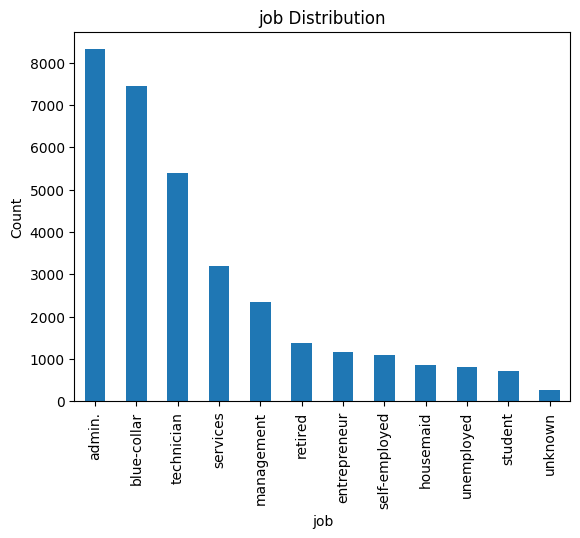

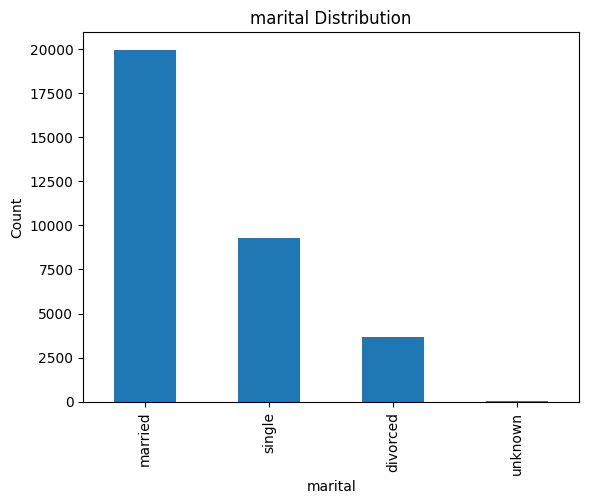

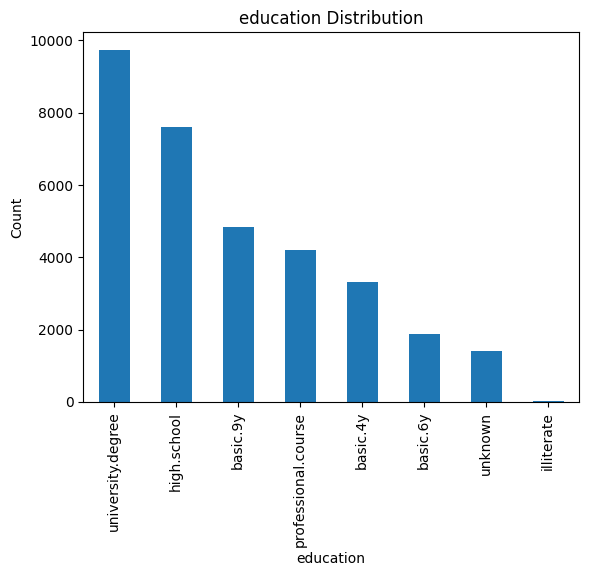

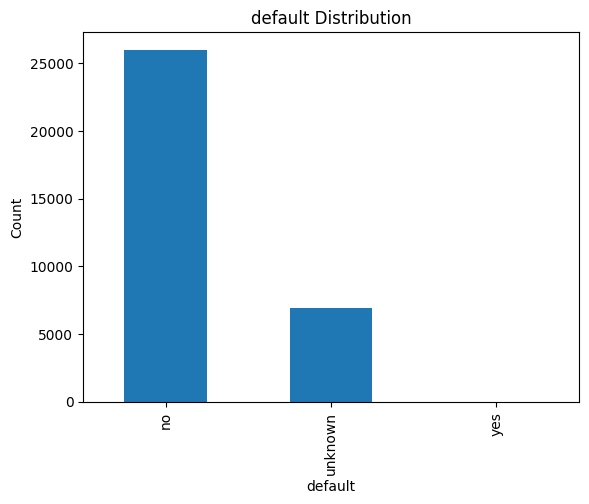

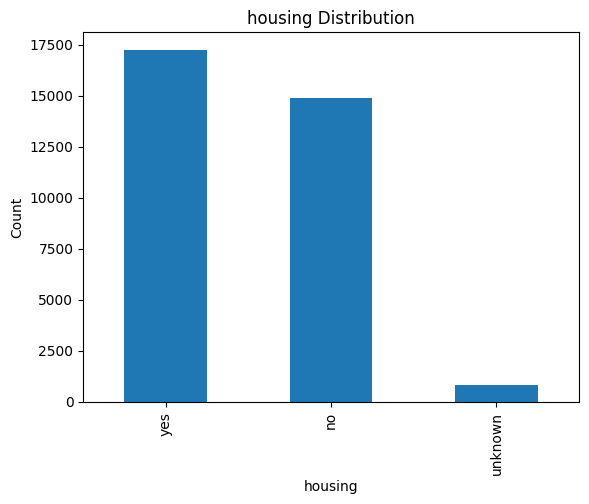

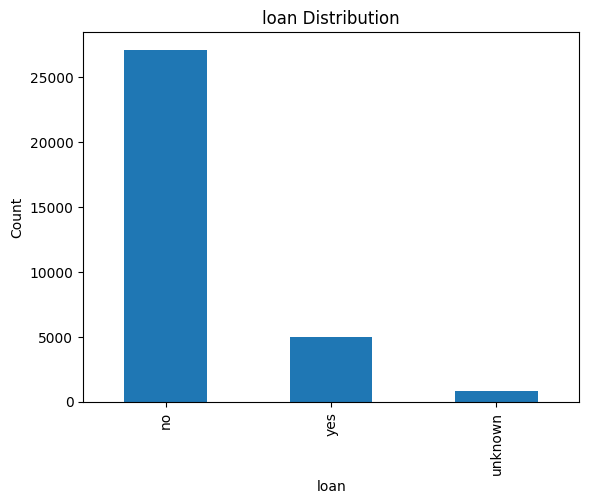

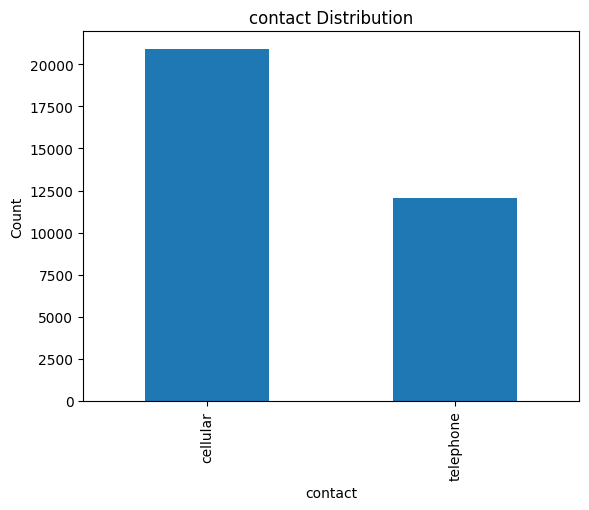

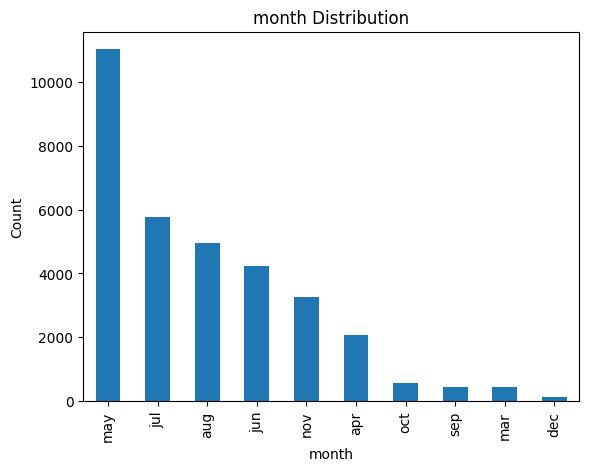

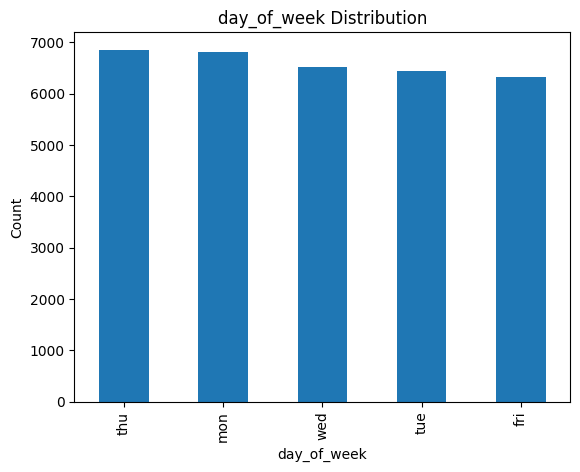

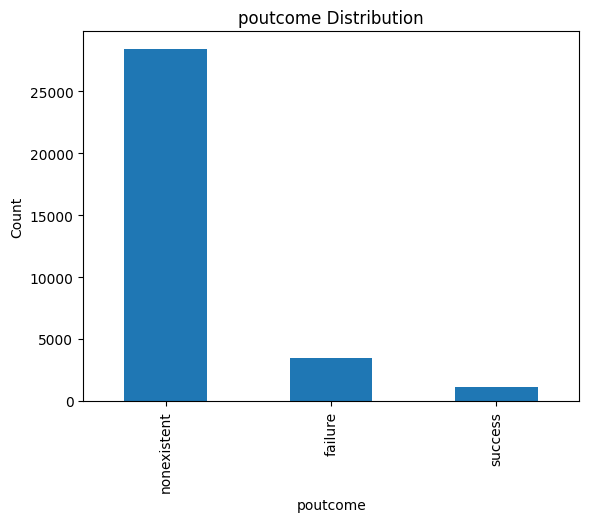

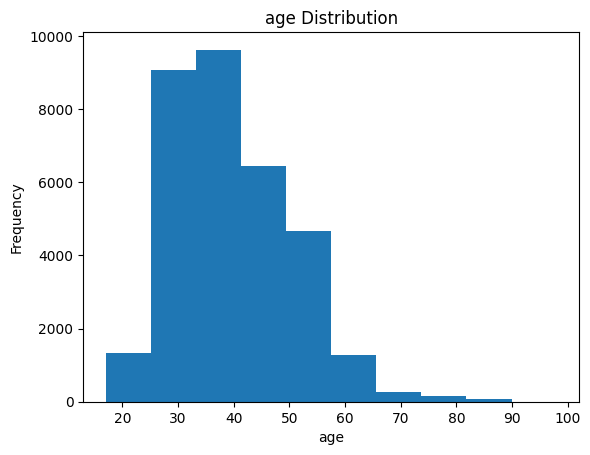

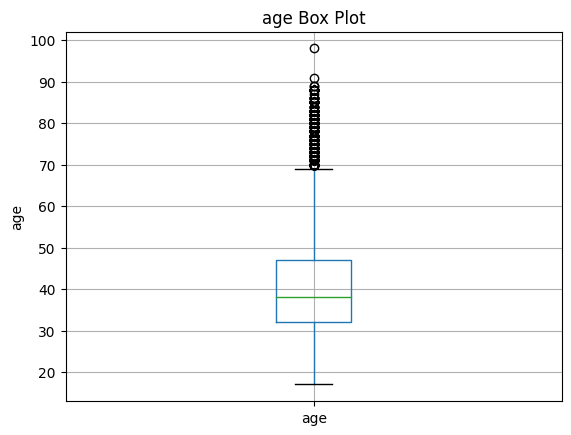

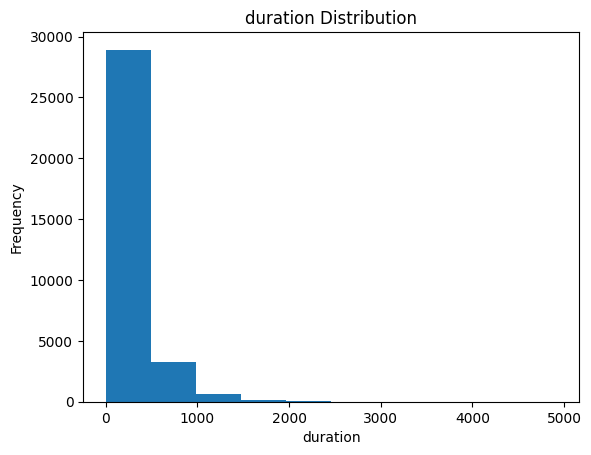

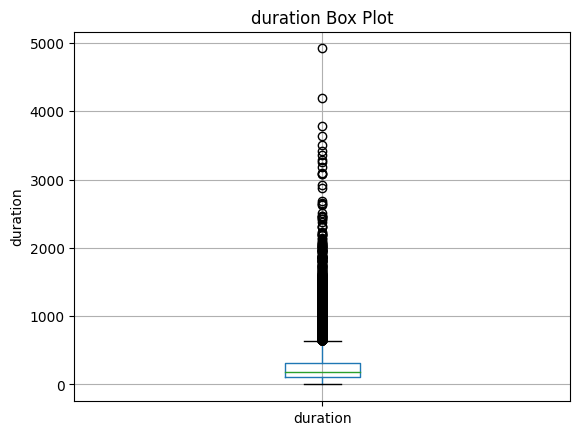

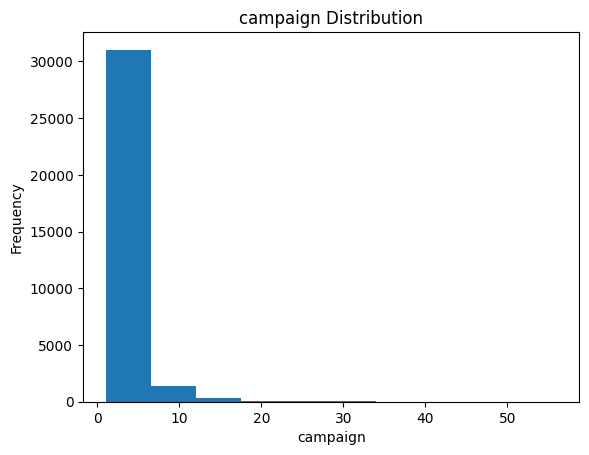

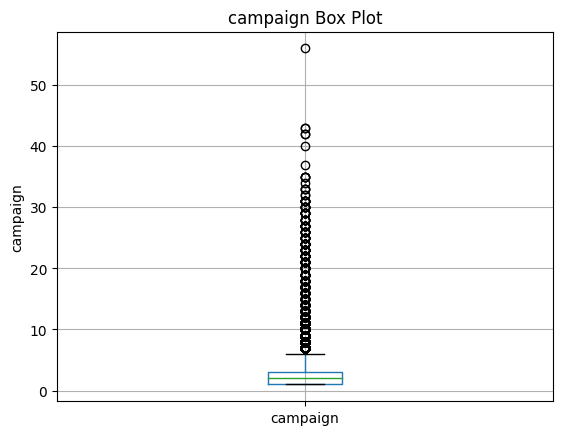

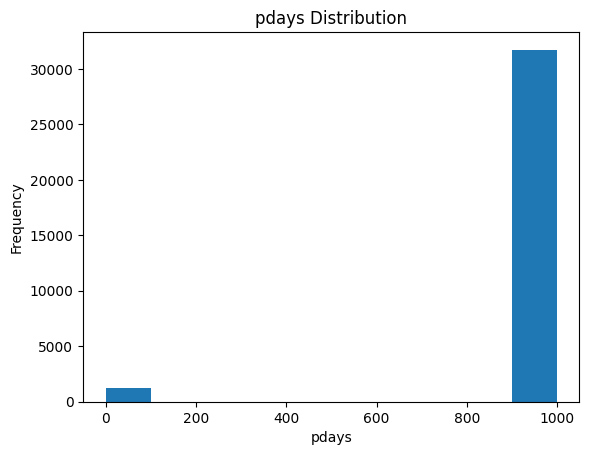

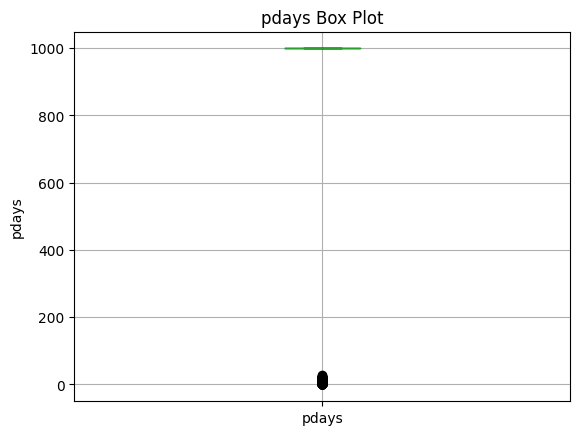

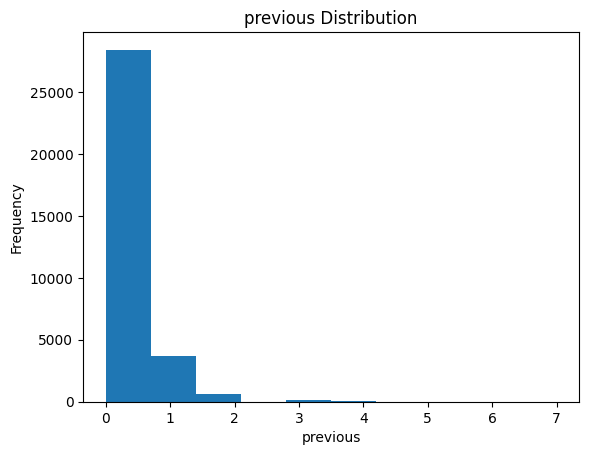

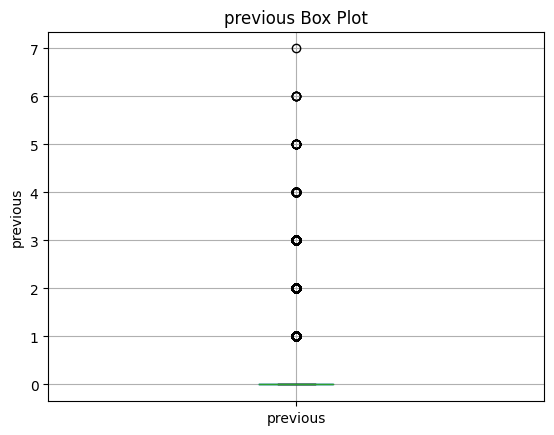

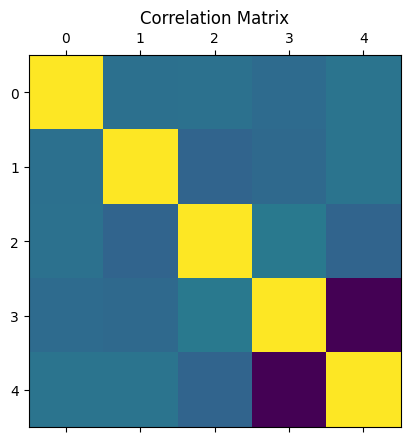

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

def explore_data(data):
    """Performs exploratory data analysis using visualizations."""
    # Explore categorical features
    categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
    for col in categorical_columns:
        data[col].value_counts().plot(kind="bar")
        plt.title(f"{col} Distribution")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

    # Explore numerical features
    numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']
    for col in numerical_columns:
        plt.hist(data[col])
        plt.title(f"{col} Distribution")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

        # Box plot
        data.boxplot(column=col)
        plt.title(f"{col} Box Plot")
        plt.ylabel(col)
        plt.show()

    # Correlation matrix
    plt.matshow(data.corr(numeric_only=True))
    plt.title("Correlation Matrix")
    plt.show()

data = pd.read_csv("/content/new_train.csv")
explore_data(data)


Original Data:
   age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexistent   no

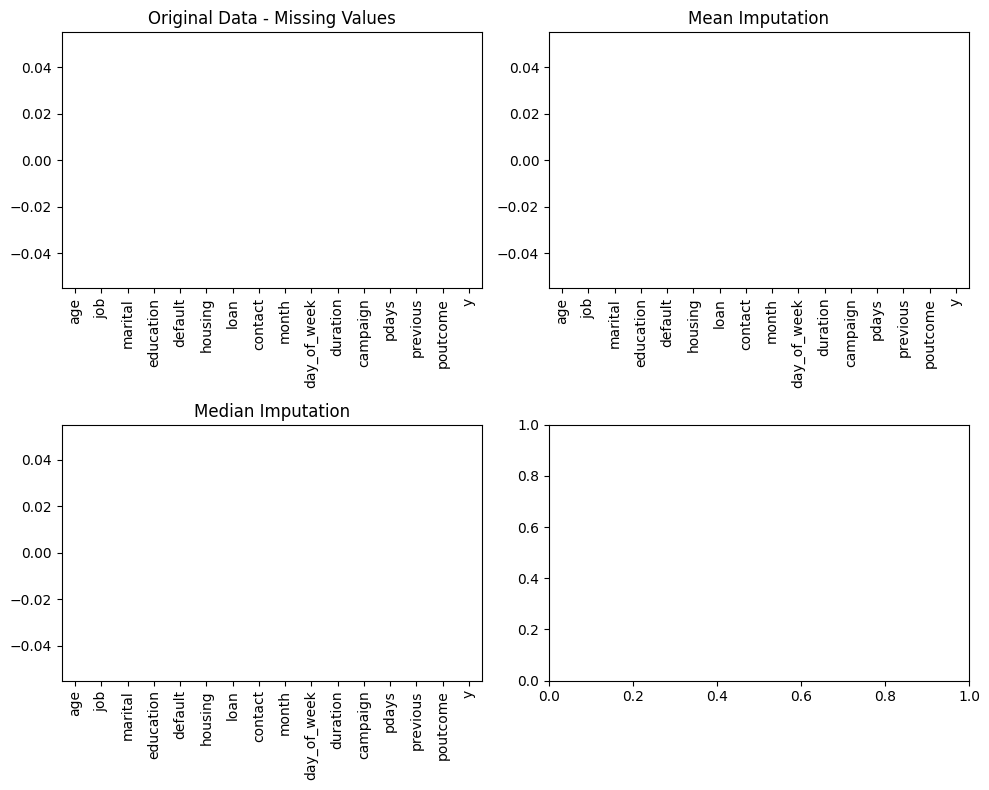


Mean Imputed Data:
   age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexistent

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def handle_missing_data(data):
    """Handles missing data in numeric columns."""
    # Original data with missing values
    print("Original Data:")
    print(data.head())

    # Mean imputation
    mean_imputed_data = data.fillna(data.mean(numeric_only=True))

    # Median imputation
    median_imputed_data = data.fillna(data.median(numeric_only=True))

    # Visual comparison of the results
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

    data.isnull().mean().plot(kind='bar', ax=axes[0, 0])
    axes[0, 0].set_title('Original Data - Missing Values')

    mean_imputed_data.isnull().mean().plot(kind='bar', ax=axes[0, 1])
    axes[0, 1].set_title('Mean Imputation')

    median_imputed_data.isnull().mean().plot(kind='bar', ax=axes[1, 0])
    axes[1, 0].set_title('Median Imputation')

    plt.tight_layout()
    plt.show()

    # Print imputed data
    print("\nMean Imputed Data:")
    print(mean_imputed_data.head())
    print("\nMedian Imputed Data:")
    print(median_imputed_data.head())

data = pd.read_csv("/content/new_train.csv")
handle_missing_data(data)


In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

def log_transformation(data):
    """Applies log transformation to 'duration' column."""
    epsilon = 1e-8
    data['duration_log'] = np.log(data['duration'] + epsilon)
    return data

def z_score_normalization(data):
    """Applies Z-score normalization (Standardization) to numerical features."""
    scaler = StandardScaler()
    data_normalized = pd.DataFrame(scaler.fit_transform(data.select_dtypes(include=['int64', 'float64'])), columns=data.select_dtypes(include=['int64', 'float64']).columns)
    return data_normalized

def decimal_scaling_normalization(data):
    """Applies Decimal scaling normalization to numerical features."""
    scaled_data = data.copy()
    for col in scaled_data.select_dtypes(include=['int64', 'float64']).columns:
        max_val = scaled_data[col].max()
        power = len(str(int(max_val)))
        scaled_data[col] = scaled_data[col] / (10 ** power)
    return scaled_data

def min_max_scaling(data):
    """Applies Min-Max scaling to numerical features."""
    scaler = MinMaxScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data.select_dtypes(include=['int64', 'float64'])), columns=data.select_dtypes(include=['int64', 'float64']).columns)
    return data_scaled

data = pd.read_csv("/content/new_train.csv")

# Apply log transformation
data_log_transformed = log_transformation(data)

# Apply Z-score normalization
data_z_score_normalized = z_score_normalization(data)

# Apply Decimal scaling normalization
data_decimal_scaled = decimal_scaling_normalization(data)

# Apply Min-Max scaling
data_min_max_scaled = min_max_scaling(data)

# Print transformed data
print("Log Transformed Data:")
print(data_log_transformed.head())

print("\nZ-score Normalized Data:")
print(data_z_score_normalized.head())

print("\nDecimal Scaled Data:")
print(data_decimal_scaled.head())

print("\nMin-Max Scaled Data:")
print(data_min_max_scaled.head())


Log Transformed Data:
   age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y  duration_log  
0  nonexistent   no      5.424950  
1      failure   no      5.3

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
file_path = "/content/new_train.csv"
data = pd.read_csv(file_path)

# One-Hot Encoding for categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Split data into features and target
X = data_encoded.drop(columns=['y'])
y = data_encoded['y']  # Assuming 'y' is the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train machine learning models on original dataset
models_original = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

trained_models_original = {}
for name, model in models_original.items():
    model.fit(X_train, y_train)
    trained_models_original[name] = model

# Train machine learning models on pre-processed dataset
models_processed = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

trained_models_processed = {}
for name, model in models_processed.items():
    model.fit(X_train, y_train)
    trained_models_processed[name] = model

# Evaluate trained models on original dataset
print("Evaluation on Original Dataset:")
for name, model in trained_models_original.items():
    print(f"Model: {name}")
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("="*50)

# Evaluate trained models on pre-processed dataset
print("Evaluation on Pre-processed Dataset:")
for name, model in trained_models_processed.items():
    print(f"Model: {name}")
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("="*50)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Evaluation on Original Dataset:
Model: KNN
[[5583  215]
 [ 504  288]]
              precision    recall  f1-score   support

          no       0.92      0.96      0.94      5798
         yes       0.57      0.36      0.44       792

    accuracy                           0.89      6590
   macro avg       0.74      0.66      0.69      6590
weighted avg       0.88      0.89      0.88      6590

Model: SVM
[[5684  114]
 [ 563  229]]
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      5798
         yes       0.67      0.29      0.40       792

    accuracy                           0.90      6590
   macro avg       0.79      0.63      0.67      6590
weighted avg       0.88      0.90      0.88      6590

Model: Naive Bayes
[[5359  439]
 [ 398  394]]
              precision    recall  f1-score   support

          no       0.93      0.92      0.93      5798
         yes       0.47      0.50      0.48       792

    accuracy                

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_models(trained_models_original, X_train, y_train):
    """Evaluate trained models."""
    for name, model in trained_models_original.items():
        print(f"Model: {name}")
        y_pred = model.predict(X_test)
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("="*50)

def evaluate_models(trained_models_processed, X_train, y_train):
    """Evaluate trained models."""
    for name, model in trained_models_processed.items():
        print(f"Model: {name}")
        y_pred = model.predict(X_test)
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("="*50)

# Evaluate models on unprocessed dataset
print("Evaluation on Unprocessed Dataset:")
evaluate_models(trained_models_original, X_train, y_train)

# Evaluate models on Processed dataset
print("Evaluation on Processed Dataset:")
evaluate_models(trained_models_processed, X_train, y_train)


Evaluation on Unprocessed Dataset:
Model: KNN
Confusion Matrix:
[[5583  215]
 [ 504  288]]

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.96      0.94      5798
         yes       0.57      0.36      0.44       792

    accuracy                           0.89      6590
   macro avg       0.74      0.66      0.69      6590
weighted avg       0.88      0.89      0.88      6590

Model: SVM
Confusion Matrix:
[[5684  114]
 [ 563  229]]

Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      5798
         yes       0.67      0.29      0.40       792

    accuracy                           0.90      6590
   macro avg       0.79      0.63      0.67      6590
weighted avg       0.88      0.90      0.88      6590

Model: Naive Bayes
Confusion Matrix:
[[5359  439]
 [ 398  394]]

Classification Report:
              precision    recall  f1-score   support

        